In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import NoSuchElementException
# from bs4 import BeautifulSoup
# import time
# import pandas as pd

# # 드라이버 실행
# driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

# # 1. 잡코리아 접속
# driver.get("https://www.jobkorea.co.kr/")
# time.sleep(1)

# # 2. 검색창에 '로봇' 입력
# search_input = driver.find_element(By.ID, "stext")
# search_input.send_keys("로봇")
# search_input.send_keys(Keys.RETURN)
# time.sleep(1)

# # 3. 상단 탭 중 '기업정보' 탭 클릭
# corp_tab = driver.find_element(
#     By.XPATH,
#     '//span[text()="기업정보" and contains(@class, "Tabs_triggerText_default")]'
# )
# corp_tab.click()
# time.sleep(1)

# company_tab = driver.find_element(
#     By.XPATH,
#     '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
# )
# company_tab.click()
# time.sleep(1)
# 0
# # ✅ 새 창(또는 새 탭)으로 전환
# driver.switch_to.window(driver.window_handles[-1])
# time.sleep(1)  # 페이지 로딩 대기

# # ✅ th 태그 수집 (field-label)
# th_elements = driver.find_elements(By.CSS_SELECTOR, "th.field-label")
# field_labels = [th.text.strip() for th in th_elements]

# # print("수집된 field-label 항목:")
# # for label in field_labels:
# #     print("-", label)

# # ✅ value 클래스가 포함된 값 수집
# tbody = driver.find_element(By.TAG_NAME, "tbody")
# value_elements = tbody.find_elements(By.CLASS_NAME, "value")
# value_texts = [v.text.strip() for v in value_elements]

# # print("수집된 value 항목:")
# # for value in value_texts:
# #     print("-", value)

# # ✅ field-label과 value 매칭
# company_info = dict(zip(field_labels, value_texts))

# current_url = driver.current_url
# salary_url = current_url.rstrip("/") + "/salary"
# driver.get(salary_url)
# time.sleep(1)  # 페이지 로딩 대기

# salary_section = driver.find_element(By.CLASS_NAME, "salary")
# value_elements = salary_section.find_elements(By.CLASS_NAME, "value")
# value_texts = [v.text.strip() for v in value_elements]

# # print("수집된 연봉 정보:")
# # for value in value_texts:
# #     print("-", value)

# # ✅ 평균연봉 컬럼 추가
# company_info["평균연봉"] = value_texts

# # ✅ pandas DataFrame 생성 및 저장
# df = pd.DataFrame([company_info])  # 단일 row로 저장

# df.to_csv("../data/company_info.csv", index=False, encoding="utf-8-sig")


# driver.close()    







In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# import pandas as pd
# import time

# # 설정
# N = 10  # 수집할 기업 수
# data_list = []

# # 드라이버 실행
# driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

# # 1. 잡코리아 접속
# driver.get("https://www.jobkorea.co.kr/")
# time.sleep(1)

# # 2. '로봇' 검색
# search_input = driver.find_element(By.ID, "stext")
# search_input.send_keys("로봇")
# search_input.send_keys(Keys.RETURN)
# time.sleep(2)

# # 3. '기업정보' 탭 클릭
# corp_tab = driver.find_element(
#     By.XPATH,
#     '//span[text()="기업정보" and contains(@class, "Tabs_triggerText_default")]'
# )
# corp_tab.click()
# time.sleep(2)

# # 4. 기업 리스트 수집
# company_elements = driver.find_elements(
#     By.XPATH,
#     '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
# )

# # ✅ 최대 N개 기업 반복 수집
# for i in range(min(N, len(company_elements))):
#     # 기업 요소 재수집 (중간에 stale 될 수 있으므로 매번 다시 찾음)
#     company_elements = driver.find_elements(
#         By.XPATH,
#         '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
#     )
#     company_elements[i].click()
#     time.sleep(2)

#     # 새 창으로 전환
#     driver.switch_to.window(driver.window_handles[-1])
#     time.sleep(1)

#     # 기업 정보 수집
#     try:
#         th_elements = driver.find_elements(By.CSS_SELECTOR, "th.field-label")
#         field_labels = [th.text.strip() for th in th_elements]

#         tbody = driver.find_element(By.TAG_NAME, "tbody")
#         value_elements = tbody.find_elements(By.CLASS_NAME, "value")
#         value_texts = [v.text.strip() for v in value_elements]

#         company_info = dict(zip(field_labels, value_texts))

#         # 연봉 페이지 이동
#         salary_button = driver.find_element(
#         By.XPATH,
#         '//a[.//div[text()="연봉정보"]]'  # 텍스트가 '연봉정보'인 <div>를 포함한 <a> 태그
#     )
#         salary_button.click()
#         time.sleep(2)

#         salary_section = driver.find_element(By.CLASS_NAME, "salary")
#         salary_values = salary_section.find_elements(By.CLASS_NAME, "value")
#         average_salary = salary_values[0].text.strip() if salary_values else ""

#         # 평균연봉 추가
#         company_info["평균연봉"] = average_salary

#         data_list.append(company_info)
#     except Exception as e:
#         print(f"[{i+1}] 기업 수집 실패:", e)

#     # 창 닫고 원래 창으로 돌아가기
#     driver.close()
#     driver.switch_to.window(driver.window_handles[0])
#     time.sleep(1)

# # 전체 결과 저장
# df = pd.DataFrame(data_list)
# df.to_csv("../data/company_robot_info.csv", index=False, encoding="utf-8-sig")

# driver.quit()
# print("✅ 모든 기업 데이터 수집 및 저장 완료!")




✅ 모든 기업 데이터 수집 및 저장 완료!


In [39]:
driver.quit()

In [ ]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# import pandas as pd
# import time

# N = 22  # 수집할 기업 수
# data_list = []
# collected = 0  # 수집한 기업 수

# driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

# driver.get("https://www.jobkorea.co.kr/")
# time.sleep(1)

# search_input = driver.find_element(By.ID, "stext")
# search_input.send_keys("로봇")
# search_input.send_keys(Keys.RETURN)
# time.sleep(2)

# corp_tab = driver.find_element(
#     By.XPATH,
#     '//span[text()="기업정보" and contains(@class, "Tabs_triggerText_default")]'
# )
# corp_tab.click()
# time.sleep(2)

# while collected < N:
#     company_elements = driver.find_elements(
#         By.XPATH,
#         '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
#     )
#     length = len(company_elements)

#     for i in range(length):
#         if collected >= N:
#             break
#         company_elements = driver.find_elements(
#             By.XPATH,
#             '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
#         )
#         company_elements[i].click()
#         time.sleep(2)

#         driver.switch_to.window(driver.window_handles[-1])
#         time.sleep(1)

#         try:
#             th_elements = driver.find_elements(By.CSS_SELECTOR, "th.field-label")
#             field_labels = [th.text.strip() for th in th_elements]

#             tbody = driver.find_element(By.TAG_NAME, "tbody")
#             value_elements = tbody.find_elements(By.CLASS_NAME, "value")
#             value_texts = [v.text.strip() for v in value_elements]

#             company_info = dict(zip(field_labels, value_texts))

#             salary_button = driver.find_element(
#                 By.XPATH,
#                 '//a[.//div[text()="연봉정보"]]'
#             )
#             salary_button.click()
#             time.sleep(2)

#             salary_section = driver.find_element(By.CLASS_NAME, "salary")
#             salary_values = salary_section.find_elements(By.CLASS_NAME, "value")
#             average_salary = salary_values[0].text.strip() if salary_values else ""

#             company_info["평균연봉"] = average_salary

#             data_list.append(company_info)
#             collected += 1

#         except Exception as e:
#             print(f"[{collected+1}] 기업 수집 실패:", e)

#         driver.close()
#         driver.switch_to.window(driver.window_handles[0])
#         time.sleep(1)

#     if collected >= N:
#         break

#     try:
#         next_btn = driver.find_element(
#             By.CSS_SELECTOR,
#             "span.Typography_variant_size14__344nw27.Typography_weight_medium__344nw2c.Typography_color_gray700__344nw2m.Pagination_text__vp58lf0.Pagination_textVariant_default__vp58lf1"
#         )
#         next_btn.click()
#         time.sleep(3)
#     except Exception as e:
#         print("다음 페이지 버튼 없음 또는 클릭 실패:", e)
#         break

# df = pd.DataFrame(data_list)
# df.to_csv("../data/company_robot_info.csv", index=False, encoding="utf-8-sig")

# driver.quit()
# print(f"✅ 총 {collected}개 기업 데이터 수집 및 저장 완료!")


[16] 기업 수집 실패: Alert Text: 해당 기업은 연봉 정보를 제공하지 않습니다.
Message: unexpected alert open: {Alert text : 해당 기업은 연봉 정보를 제공하지 않습니다.}
  (Session info: chrome=138.0.7204.49)
Stacktrace:
#0 0x574d2c67726a <unknown>
#1 0x574d2c121ab0 <unknown>
#2 0x574d2c1bfa00 <unknown>
#3 0x574d2c198f73 <unknown>
#4 0x574d2c165aeb <unknown>
#5 0x574d2c166751 <unknown>
#6 0x574d2c63bb7b <unknown>
#7 0x574d2c63f959 <unknown>
#8 0x574d2c622959 <unknown>
#9 0x574d2c640518 <unknown>
#10 0x574d2c60710f <unknown>
#11 0x574d2c664918 <unknown>
#12 0x574d2c664af6 <unknown>
#13 0x574d2c676586 <unknown>
#14 0x7d6798a9caa4 <unknown>
#15 0x7d6798b29c3c <unknown>

✅ 총 22개 기업 데이터 수집 및 저장 완료!


# 이것이 데이터 크롤링 최종 코드

In [ ]:


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium_stealth import stealth
import pandas as pd
import time
import undetected_chromedriver as uc


N = 120  # 수집할 기업 수
data_list = []
collected = 0  # 수집한 기업 수

# driver = webdriver.Chrome(service=Service("../driver/chromedriver"))



stealth(driver,
        languages=["ko-KR", "ko"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
       )

driver.get("https://www.jobkorea.co.kr/")
time.sleep(1)

search_input = driver.find_element(By.ID, "stext")
search_input.send_keys("로봇")
search_input.send_keys(Keys.RETURN)
time.sleep(2)

corp_tab = driver.find_element(
    By.XPATH,
    '//span[text()="기업정보" and contains(@class, "Tabs_triggerText_default")]'
)
corp_tab.click()
time.sleep(2)

current_page = 1  # 현재 페이지 추적용 변수

while collected < N:
    # 현재 페이지 기업 리스트 재수집
    company_elements = driver.find_elements(
        By.XPATH,
        '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
    )
    length = len(company_elements)

    for i in range(length):
        if collected >= N:
            break

        # 매번 클릭 전 리스트 다시 가져오기 (stale element 방지)
        company_elements = driver.find_elements(
            By.XPATH,
            '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
        )
        try:
            company_elements[i].click()
        except Exception as e:
            print(f"[{collected+1}] 기업 클릭 실패:", e)
            continue

        time.sleep(2)

        driver.switch_to.window(driver.window_handles[-1])
        time.sleep(1)

        try:
            # 회사 이름 추출
            company_name = driver.find_element(By.CLASS_NAME, "name").text.strip()

            # 필드 라벨과 값 추출
            th_elements = driver.find_elements(By.CSS_SELECTOR, "th.field-label")
            field_labels = [th.text.strip() for th in th_elements]

            tbody = driver.find_element(By.TAG_NAME, "tbody")
            value_elements = tbody.find_elements(By.CLASS_NAME, "value")
            value_texts = [v.text.strip() for v in value_elements]

            # 딕셔너리 생성 (회사명 먼저 넣기)
            company_info = {"회사명": company_name}
            company_info.update(dict(zip(field_labels, value_texts)))

            # 연봉정보 클릭 및 추출
            salary_button = driver.find_element(
                By.XPATH,
                '//a[.//div[text()="연봉정보"]]'
            )
            salary_button.click()
            time.sleep(2)

            salary_section = driver.find_element(By.CLASS_NAME, "salary")
            salary_values = salary_section.find_elements(By.CLASS_NAME, "value")
            average_salary = salary_values[0].text.strip() if salary_values else ""

            company_info["평균연봉"] = average_salary

            data_list.append(company_info)
            collected += 1
            print(f"[{collected}] 기업 정보 수집 완료")

        except Exception as e:
            print(f"[{collected+1}] 기업 정보 수집 실패:", e)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        time.sleep(1)

    if collected >= N:
        break

    try:
        next_page = current_page + 1

        if current_page % 10 == 0:
            # 10의 배수일 때는 → 아이콘 클릭 (다음 페이지 그룹 이동)
            next_icon = driver.find_element(
                By.CSS_SELECTOR,
                "i.jds-icon.jds-icon--system_arrow_right.Icon_root__1516qwb0.Icon_color_gray500__1516qwb6.Icon_size_20__1516qwbk"
            )
            next_icon.find_element(By.XPATH, './ancestor::a').click()
            time.sleep(3)
            current_page = next_page
            continue  # 다음 루프로 진행

        # 페이지네이션 내 모든 페이지 번호 span 찾기
        page_spans = driver.find_elements(
            By.CSS_SELECTOR,
            "span.Typography_variant_size14__344nw27.Typography_weight_medium__344nw2c.Typography_color_gray700__344nw2m.Pagination_text__vp58lf0.Pagination_textVariant_default__vp58lf1"
        )

        next_btn = None
        for span in page_spans:
            if span.text.strip() == str(next_page):
                next_btn = span
                break

        if next_btn is None:
            print("다음 페이지 버튼이 없습니다. 종료합니다.")
            break

        # 부모 <a> 태그 클릭
        next_btn.find_element(By.XPATH, './ancestor::a').click()
        current_page = next_page
        time.sleep(3)  # 페이지 로딩 대기

    except Exception as e:
        print("다음 페이지 버튼 클릭 실패:", e)
        break

df = pd.DataFrame(data_list)
df.to_csv("../data/company_robot_info.csv", index=False, encoding="utf-8-sig")

driver.quit()
print(f"✅ 총 {collected}개 기업 데이터 수집 및 저장 완료!")


[1] 기업 정보 수집 완료
[2] 기업 정보 수집 완료
[3] 기업 정보 수집 완료
[4] 기업 정보 수집 완료
[5] 기업 정보 수집 완료
[6] 기업 정보 수집 완료
[7] 기업 정보 수집 완료
[8] 기업 정보 수집 완료
[9] 기업 정보 수집 완료
[10] 기업 정보 수집 완료
[11] 기업 정보 수집 완료
[12] 기업 정보 수집 완료
[13] 기업 정보 수집 완료
[14] 기업 정보 수집 완료
[15] 기업 정보 수집 완료
[16] 기업 정보 수집 완료
[17] 기업 정보 수집 실패: Alert Text: 해당 기업은 연봉 정보를 제공하지 않습니다.
Message: unexpected alert open: {Alert text : 해당 기업은 연봉 정보를 제공하지 않습니다.}
  (Session info: chrome=138.0.7204.49)
Stacktrace:
#0 0x5e47b1a3d26a <unknown>
#1 0x5e47b14e7ab0 <unknown>
#2 0x5e47b1585a00 <unknown>
#3 0x5e47b155ef73 <unknown>
#4 0x5e47b152baeb <unknown>
#5 0x5e47b152c751 <unknown>
#6 0x5e47b1a01b7b <unknown>
#7 0x5e47b1a05959 <unknown>
#8 0x5e47b19e8959 <unknown>
#9 0x5e47b1a06518 <unknown>
#10 0x5e47b19cd10f <unknown>
#11 0x5e47b1a2a918 <unknown>
#12 0x5e47b1a2aaf6 <unknown>
#13 0x5e47b1a3c586 <unknown>
#14 0x7a633129caa4 <unknown>
#15 0x7a6331329c3c <unknown>

[17] 기업 정보 수집 완료
[18] 기업 정보 수집 완료
[19] 기업 정보 수집 완료
[20] 기업 정보 수집 완료
[21] 기업 정보 수집 완료
[22] 기업 정보 수집 완료
[2

In [ ]:
# 10페이지에서 넘어가는 구문 추가 전 (오류가 나기 전 제발 돌아갔으면ㅠㅠ) 회사이름까지 추가 ver.

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium_stealth import stealth
import pandas as pd
import time

N = 120  # 수집할 기업 수
data_list = []
collected = 0  # 수집한 기업 수

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

stealth(driver,
        languages=["ko-KR", "ko"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
       )

driver.get("https://www.jobkorea.co.kr/")
time.sleep(1)

search_input = driver.find_element(By.ID, "stext")
search_input.send_keys("로봇")
search_input.send_keys(Keys.RETURN)
time.sleep(2)

corp_tab = driver.find_element(
    By.XPATH,
    '//span[text()="기업정보" and contains(@class, "Tabs_triggerText_default")]'
)
corp_tab.click()
time.sleep(2)

current_page = 1  # 현재 페이지 추적용 변수

while collected < N:
    # 현재 페이지 기업 리스트 재수집
    company_elements = driver.find_elements(
        By.XPATH,
        '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
    )
    length = len(company_elements)

    for i in range(length):
        if collected >= N:
            break

        # 매번 클릭 전 리스트 다시 가져오기 (stale element 방지)
        company_elements = driver.find_elements(
            By.XPATH,
            '//span[@class="Typography_variant_size18__344nw25 Typography_weight_medium__344nw2c Typography_color_gray900__344nw2k"]'
        )
        try:
            company_elements[i].click()
        except Exception as e:
            print(f"[{collected+1}] 기업 클릭 실패:", e)
            continue

        time.sleep(2)

        driver.switch_to.window(driver.window_handles[-1])
        time.sleep(1)

        try:
            # 회사 이름 추출
            company_name = driver.find_element(By.CLASS_NAME, "name").text.strip()

            # 필드 라벨과 값 추출
            th_elements = driver.find_elements(By.CSS_SELECTOR, "th.field-label")
            field_labels = [th.text.strip() for th in th_elements]

            tbody = driver.find_element(By.TAG_NAME, "tbody")
            value_elements = tbody.find_elements(By.CLASS_NAME, "value")
            value_texts = [v.text.strip() for v in value_elements]

            # 딕셔너리 생성 (회사명 먼저 넣기)
            company_info = {"회사명": company_name}
            company_info.update(dict(zip(field_labels, value_texts)))

            # 연봉정보 클릭 및 추출
            salary_button = driver.find_element(
                By.XPATH,
                '//a[.//div[text()="연봉정보"]]'
            )
            salary_button.click()
            time.sleep(2)

            salary_section = driver.find_element(By.CLASS_NAME, "salary")
            salary_values = salary_section.find_elements(By.CLASS_NAME, "value")
            average_salary = salary_values[0].text.strip() if salary_values else ""

            company_info["평균연봉"] = average_salary

            data_list.append(company_info)
            collected += 1
            print(f"[{collected}] 기업 정보 수집 완료")

        except Exception as e:
            print(f"[{collected+1}] 기업 정보 수집 실패:", e)

        driver.close()
        driver.switch_to.window(driver.window_handles[0])
        time.sleep(1)

    if collected >= N:
        break

    try:
        next_page = current_page + 1

        # 페이지네이션 내 모든 페이지 번호 span 찾기
        page_spans = driver.find_elements(
            By.CSS_SELECTOR,
            "span.Typography_variant_size14__344nw27.Typography_weight_medium__344nw2c.Typography_color_gray700__344nw2m.Pagination_text__vp58lf0.Pagination_textVariant_default__vp58lf1"
        )

        next_btn = None
        for span in page_spans:
            if span.text.strip() == str(next_page):
                next_btn = span
                break

        if next_btn is None:
            print("다음 페이지 버튼이 없습니다. 종료합니다.")
            break

        # 부모 <a> 태그 클릭
        next_btn.find_element(By.XPATH, './ancestor::a').click()
        current_page = next_page
        time.sleep(3)  # 페이지 로딩 대기

    except Exception as e:
        print("다음 페이지 버튼 클릭 실패:", e)
        break

df = pd.DataFrame(data_list)
df.to_csv("../data/company_robot_info.csv", index=False, encoding="utf-8-sig")

driver.quit()
print(f"✅ 총 {collected}개 기업 데이터 수집 및 저장 완료!")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/company_robot_info.csv")

raw_data = pd.read_csv("../data/company_robot_info.csv")

raw_data["주소"] = raw_data["주소"].str.slice(0,2)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     49 non-null     object
 1   산업      48 non-null     object
 2   사원수     48 non-null     object
 3   기업구분    48 non-null     object
 4   설립일     48 non-null     object
 5   자본금     48 non-null     object
 6   매출액     48 non-null     object
 7   대표자     48 non-null     object
 8   주요사업    48 non-null     object
 9   4대보험    48 non-null     object
 10  홈페이지    48 non-null     object
 11  주소      43 non-null     object
 12  평균연봉    49 non-null     int64 
 13  대졸초임    5 non-null      object
dtypes: int64(1), object(13)
memory usage: 5.5+ KB


In [2]:
raw_data["설립일"] = raw_data["설립일"].str.slice(0,4)

In [6]:
import re 

raw_data["자본금"] = raw_data["자본금"].astype(str).apply(
    lambda x: re.search(r'\d+억', x).group(0) if re.search(r'\d+억', x) else ""
)

In [9]:
raw_data["매출액"] = raw_data["매출액"].astype(str).apply(
    lambda x: re.search(r'\d+억', x).group(0) if re.search(r'\d+억', x) else ""
)

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     49 non-null     object
 1   산업      48 non-null     object
 2   사원수     48 non-null     object
 3   기업구분    48 non-null     object
 4   설립일     48 non-null     object
 5   자본금     49 non-null     object
 6   매출액     49 non-null     object
 7   대표자     48 non-null     object
 8   주요사업    48 non-null     object
 9   4대보험    48 non-null     object
 10  홈페이지    48 non-null     object
 11  주소      43 non-null     object
 12  평균연봉    49 non-null     int64 
 13  대졸초임    5 non-null      object
dtypes: int64(1), object(13)
memory usage: 5.5+ KB


In [10]:
raw_data["자본금_숫자"] = raw_data["자본금"].str.extract(r'(\d+)').astype(float)
raw_data["매출액_숫자"] = raw_data["매출액"].str.extract(r'(\d+)').astype(float)
raw_data["사원수_숫자"] = raw_data["사원수"].str.extract(r'(\d+)').astype(float)


In [11]:
raw_data.to_csv("../data/company_robot_info_cleaned.csv", index=False, encoding="utf-8-sig")

# 로봇회사는 어떤 지역 에 많을까?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("../data/company_robot_info_cleaned.csv")

df["지역"] = df["주소"].astype(str).str.extract(r'^([가-힣]{2,4})')

region_counts = df["지역"].value_counts().reset_index()
region_counts.columns = ["지역", "회사 수"]

print(region_counts)


    지역  회사 수
0   경기    12
1   서울    10
2   인천     5
3   경남     3
4   충남     3
5   대구     2
6   충북     2
7   경북     1
8   대전     1
9   전북     1
10  제주     1
11  광주     1
12  강원     1


/tmp/ipykernel_18612/4253698773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x="지역", y="회사 수", palette="viridis")


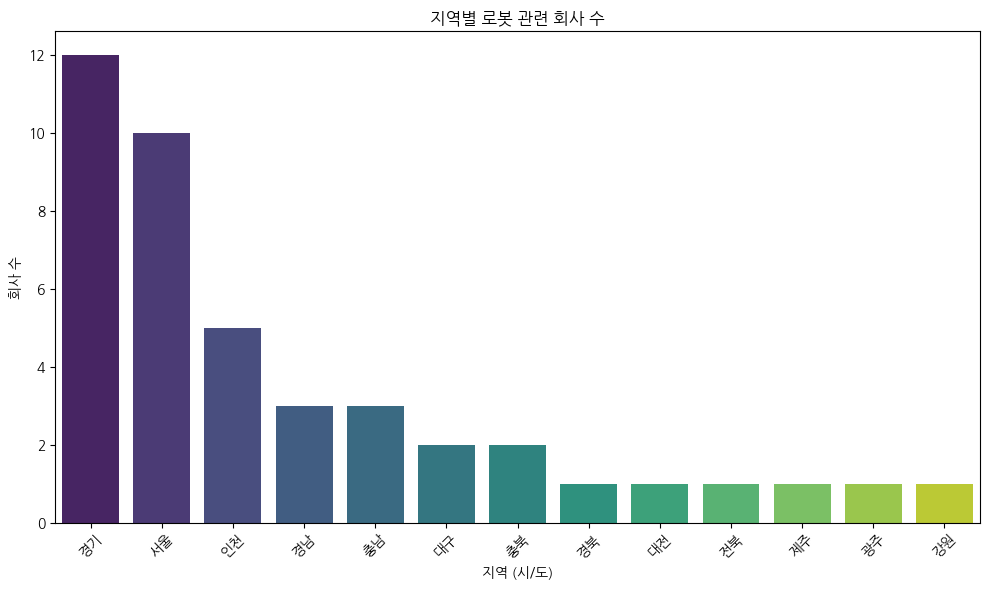

In [3]:
import koreanize_matplotlib

plt.figure(figsize=(10, 6))
sns.barplot(data=region_counts, x="지역", y="회사 수", palette="viridis")
plt.title("지역별 로봇 관련 회사 수")
plt.xlabel("지역 (시/도)")
plt.ylabel("회사 수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 오래된 회사일 수록 매출과 평균연봉의 상관관계를 분석

In [4]:
df["설립연도"] = df["설립일"].astype(str).str.extract(r'(\d{4})')
df["설립연도"] = pd.to_numeric(df["설립연도"], errors="coerce")

# 설립연차 계산 (2025년 기준)
df["설립연차"] = 2025 - df["설립연도"]

df["매출액_숫자"] = pd.to_numeric(df["매출액"].str.extract(r'(\d+)')[0], errors="coerce")
df["평균연봉"] = pd.to_numeric(
    df["평균연봉"].astype(str).str.replace(",", "", regex=False).str.extract(r"(\d+)")[0],
    errors="coerce"
)

correlation = df[["설립연차", "매출액_숫자", "평균연봉"]].corr()
print("상관계수:")
print(correlation)

상관계수:
            설립연차    매출액_숫자      평균연봉
설립연차    1.000000  0.654982  0.391653
매출액_숫자  0.654982  1.000000  0.601232
평균연봉    0.391653  0.601232  1.000000


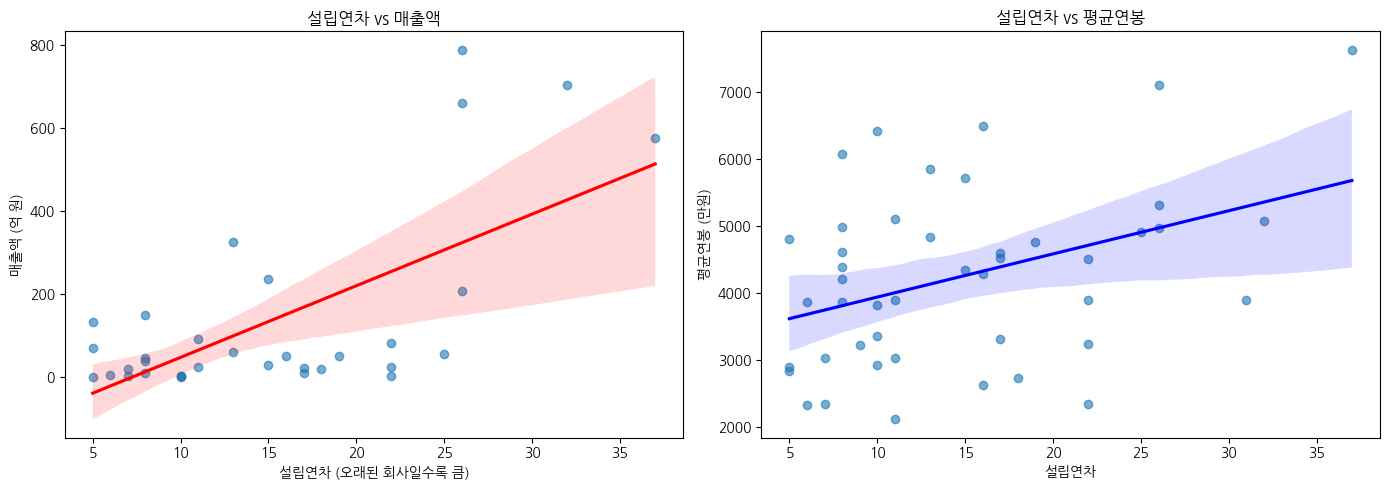

In [5]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.regplot(x="설립연차", y="매출액_숫자", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "red"})
plt.title("설립연차 vs 매출액")
plt.xlabel("설립연차 (오래된 회사일수록 큼)")
plt.ylabel("매출액 (억 원)")

# 7. 시각화: 설립연차 vs 평균연봉
plt.subplot(1, 2, 2)
sns.regplot(x="설립연차", y="평균연봉", data=df, scatter_kws={"alpha": 0.6}, line_kws={"color": "blue"})
plt.title("설립연차 vs 평균연봉")
plt.xlabel("설립연차")
plt.ylabel("평균연봉 (만원)")

plt.tight_layout()
plt.show()

# 개인적인 궁금즘. 로봇은 비싸니까 자본금(자산)이 많을 수록 매출액도 클 것이고, 평균연봉도 높을지 확인해보자 

In [6]:
df["자본금_숫자"] = pd.to_numeric(df["자본금"].str.extract(r'(\d+)')[0], errors="coerce")

correlation = df[["자본금_숫자", "매출액_숫자", "평균연봉"]].corr()
print("상관계수:")
print(correlation)

상관계수:
          자본금_숫자    매출액_숫자      평균연봉
자본금_숫자  1.000000  0.555079  0.478824
매출액_숫자  0.555079  1.000000  0.601232
평균연봉    0.478824  0.601232  1.000000


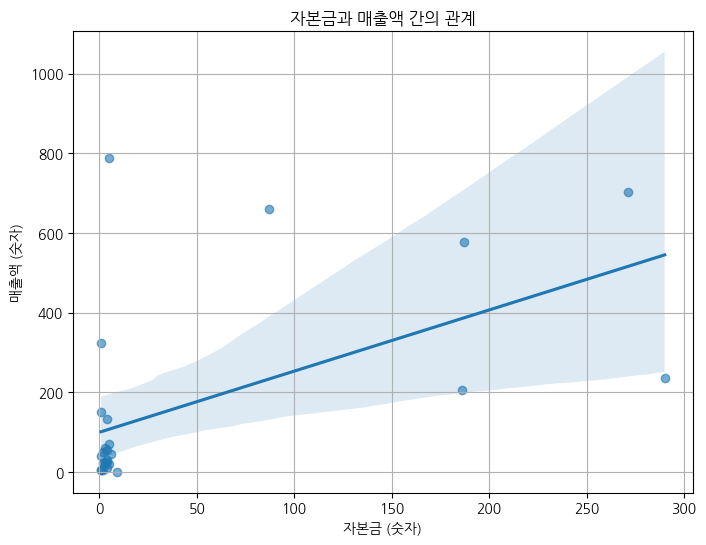

In [21]:
plt.figure(figsize=(8,6))
sns.regplot(x="자본금_숫자", y="매출액_숫자", data=df, scatter_kws={"alpha":0.6})
plt.title("자본금과 매출액 간의 관계")
plt.xlabel("자본금 (숫자)")
plt.ylabel("매출액 (숫자)")
plt.grid(True)
plt.show()

# 과연 수도권 회사가 연봉이 높을까?

In [12]:
print(region_counts)

    지역  회사 수
0   경기    12
1   서울    10
2   인천     5
3   경남     3
4   충남     3
5   대구     2
6   충북     2
7   경북     1
8   대전     1
9   전북     1
10  제주     1
11  광주     1
12  강원     1


In [9]:
region_group = df.groupby("지역")[["매출액_숫자", "평균연봉"]].mean().dropna().sort_values("매출액_숫자", ascending=False)
print(region_group)

        매출액_숫자         평균연봉
지역                         
경남  379.500000  5107.666667
충북  365.000000  4977.000000
인천  298.000000  4686.000000
대구  237.000000  5063.000000
충남  102.333333  4938.666667
경북   50.000000  4291.000000
경기   34.857143  3685.416667
서울   29.200000  4201.500000
대전   22.000000  3327.000000
전북   20.000000  3040.000000
광주   11.000000  3868.000000
강원    1.000000  2908.000000
제주    1.000000  2936.000000


/tmp/ipykernel_18612/584326234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_group.reset_index(), x="평균연봉", y="지역", palette="Greens_d")


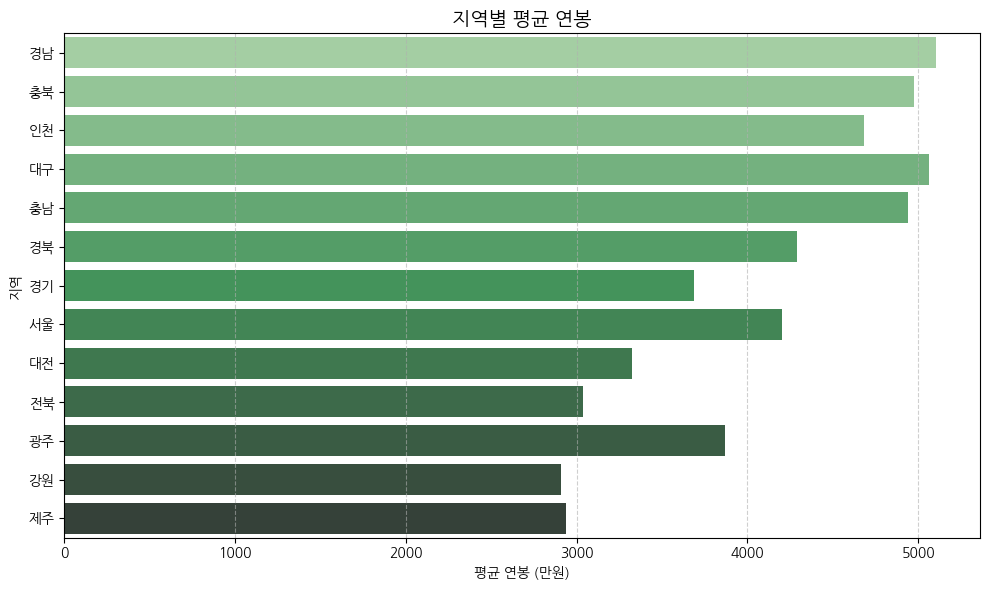

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_group.reset_index(), x="평균연봉", y="지역", palette="Greens_d")
plt.title("지역별 평균 연봉", fontsize=14)
plt.xlabel("평균 연봉 (만원)")
plt.ylabel("지역")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
# 지역별 평균 매출액 / 평균 연봉
region_group = df.groupby("지역")[["매출액_숫자", "평균연봉"]].mean()

# 지역별 기업 수
region_counts = df["지역"].value_counts().rename_axis("지역").reset_index(name="회사수")

# 두 데이터프레임 결합
region_summary = pd.merge(region_group, region_counts, on="지역").dropna()

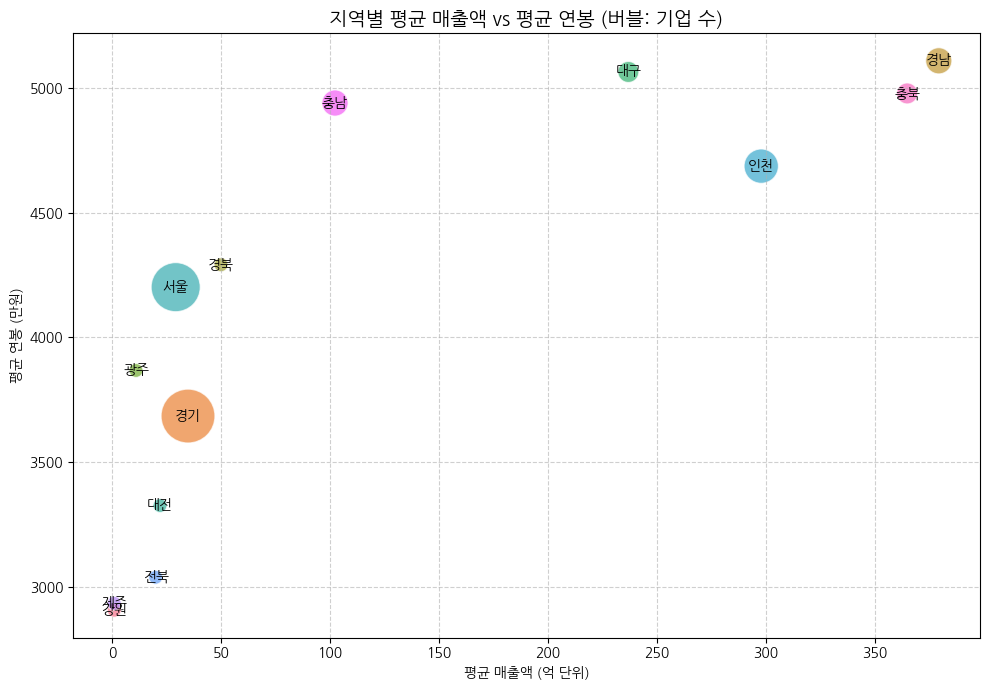

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=region_summary,
    x="매출액_숫자", y="평균연봉",
    size="회사수",
    hue="지역",  # 각 지역을 색으로 구분
    sizes=(100, 1500),  # 버블 크기 범위
    alpha=0.7,
    legend=False  # 범례 안 보이게
)

# 각 점에 지역 이름 추가
for i in range(region_summary.shape[0]):
    row = region_summary.iloc[i]
    plt.text(row["매출액_숫자"], row["평균연봉"], row["지역"], fontsize=10, ha='center', va='center')

plt.title("지역별 평균 매출액 vs 평균 연봉 (버블: 기업 수)", fontsize=14)
plt.xlabel("평균 매출액 (억 단위)")
plt.ylabel("평균 연봉 (만원)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()